# Task 3: Customer Segmentation Using RFM Analysis

## Step 1: Setup & Load the Dataset

In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('Online Retail.xlsx')

In [8]:
# display the first 5 rows
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [6]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [10]:
# Check for canceled invoices (InvoiceNo starts with 'C')
print(df[df['InvoiceNo'].astype(str).str.startswith('C')].sample(5))

       InvoiceNo StockCode                       Description  Quantity  \
73467    C542352     22666   RECIPE BOX PANTRY YELLOW DESIGN        -1   
145261   C548891     22727         ALARM CLOCK BAKELIKE RED         -1   
335184   C566280     22723     SET OF 6 HERB TINS SKETCHBOOK        -1   
201857   C554330     22767       TRIPLE PHOTO FRAME CORNICE         -1   
340574   C566671     22628  PICNIC BOXES SET OF 3 RETROSPOT         -1   

               InvoiceDate  UnitPrice  CustomerID         Country  
73467  2011-01-27 12:18:00       2.95     15596.0  United Kingdom  
145261 2011-04-04 15:34:00       3.75     13418.0  United Kingdom  
335184 2011-09-11 14:12:00       3.95     12748.0  United Kingdom  
201857 2011-05-23 17:08:00       9.95     12749.0  United Kingdom  
340574 2011-09-14 11:39:00       4.95     17841.0  United Kingdom  


In [11]:
# Check for negative or zero Quantity or UnitPrice
print(df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)].sample(5))

       InvoiceNo StockCode                    Description  Quantity  \
333199   C566185     22637          PIGGY BANK RETROSPOT         -1   
30558    C538874     22230  JIGSAW TREE WITH WATERING CAN        -1   
88211    C543789         D                       Discount        -1   
536986   C581235     22423       REGENCY CAKESTAND 3 TIER        -1   
214666   C555595     23168   CLASSIC CAFE SUGAR DISPENSER        -1   

               InvoiceDate  UnitPrice  CustomerID         Country  
333199 2011-09-09 13:02:00       2.10     18167.0  United Kingdom  
30558  2010-12-14 15:16:00       0.85     12867.0  United Kingdom  
88211  2011-02-11 17:10:00      84.80     17450.0  United Kingdom  
536986 2011-12-08 10:34:00      12.75     15950.0  United Kingdom  
214666 2011-06-06 10:14:00       1.25     17652.0  United Kingdom  


### Dataset Overview

The dataset contains transactional data from a UK-based online retailer between **December 2010 and December 2011**. Each row represents a product purchased in a specific invoice.

### Key Columns:
- **InvoiceNo**: Unique ID for each transaction
- **StockCode**: Product identifier
- **Description**: Product name
- **Quantity**: Number of items purchased
- **InvoiceDate**: Date and time of transaction
- **UnitPrice**: Price per item (GBP)
- **CustomerID**: Unique customer identifier
- **Country**: Country of purchase

### Initial Observations:
- Some rows have missing `CustomerID` values
- Canceled transactions are identifiable by `InvoiceNo` starting with `'C'`
- Negative or zero `Quantity` and `UnitPrice` values exist, likely indicating returns or data entry errors



## 🧹 Step 2: Data Cleaning

In [12]:
# Remove rows with missing CustomerID
df = df[df['CustomerID'].notnull()]

In [13]:
# Exclude canceled orders (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [ ]:
# Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None


In [20]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID     TotalPrice  
count  397924.000000  397924.000000  
mean    15294.315171      22.394749  
min     12346.000000       0.000000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.169877     309.055588  


In [21]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


### Step 2: Data Cleaning

To ensure accurate customer-level RFM analysis, we apply the following cleaning steps:

### ✅ 1. Remove rows with missing `CustomerID`
- These rows cannot be linked to any customer, making them unusable for segmentation.

### ✅ 2. Exclude canceled transactions
- Canceled orders are identified by `InvoiceNo` starting with `'C'`.
- Including them would distort Frequency and Monetary metrics.

### ✅ 3. Remove negative or zero `Quantity` and `UnitPrice`
- These entries likely represent returns or data errors.
- They can misrepresent actual purchasing behavior and skew the Monetary value.

### ✅ 4. Create `TotalPrice` column
- Calculated as `Quantity × UnitPrice`.
- This forms the basis for the Monetary metric in RFM.

These steps ensure that the dataset reflects valid, traceable customer purchases for meaningful segmentation.


## 🧮 Step 3: Feature Engineering (RFM Metrics)

We’ll calculate three metrics for each customer:

- **Recency**: Number of days since the customer's most recent purchase (relative to the dataset's latest transaction date).
- **Frequency**: Total number of unique purchase invoices associated with the customer.
- **Monetary**: Total amount spent by the customer across all transactions.


In [28]:
# Set a reference date for Recency

import datetime

# Reference date is one day after the last transaction
snapshot_date = df['InvoiceDate'].max() + datetime.timedelta(days=1)


In [29]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [24]:
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [25]:
print(rfm.describe())

         CustomerID      Recency    Frequency       Monetary
count   4339.000000  4339.000000  4339.000000    4339.000000
mean   15299.936852    92.518322     4.271952    2053.793018
std     1721.889758   100.009747     7.705493    8988.248381
min    12346.000000     1.000000     1.000000       0.000000
25%    13812.500000    18.000000     1.000000     307.245000
50%    15299.000000    51.000000     2.000000     674.450000
75%    16778.500000   142.000000     5.000000    1661.640000
max    18287.000000   374.000000   210.000000  280206.020000


### 📈 Overall Distribution

- **Recency**
  - Range: 1 to 374 days
  - Median: 51 days
  - Insight: Majority of customers haven't purchased recently

- **Frequency**
  - Range: 1 to 210 purchases
  - Median: 2 purchases
  - Insight: Most customers are infrequent buyers; few are highly loyal

- **Monetary**
  - Range: £0.00 to £280,206.02
  - Median: £674.00
  - Insight: Highly skewed distribution with a long tail of high spenders

### 🧠 Interpretation Summary

- The dataset contains a mix of dormant, loyal, and high-value one-time buyers.
- Skewed monetary values suggest a few customers contribute disproportionately to revenue.
- Recency and frequency metrics will be key in identifying re-engagement opportunities.



### 🕵️‍♂️ Noticed Anomaly: Monetary = £0.00

While reviewing the RFM distribution, I noticed that some customers have a **Monetary value of £0.00**, which is unexpected in a sales dataset.

In [31]:
zero_monetary = rfm[rfm['Monetary'] == 0]
print(zero_monetary.head())


     CustomerID  Recency  Frequency  Monetary
685     13256.0       14          1       0.0


In [32]:
zero_ids = zero_monetary['CustomerID']
df[df['CustomerID'].isin(zero_ids)].sort_values(by='CustomerID')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,0.0


### 🔍 Investigation Approach

To understand the cause, I searched for rows where the computed `TotalSum` (i.e., `Quantity * UnitPrice`) equals zero. Then I traced the corresponding `CustomerID` to inspect their transaction details.

### 🧠 Interpretation

This customer placed a large order, but the unit price was recorded as zero. Possible explanations include:
- Promotional or free items
- Internal transfers
- Data entry errors

### ✅ Assumption for Next Steps

For the purpose of RFM scoring and segmentation, I will **assume these are promotional or free items**.  
They will be **included** in the analysis but noted as non-revenue-generating transactions.

This assumption will be documented and revisited if further inconsistencies arise.


## 🧮 Step 4: RFM Scoring (Quantile-Based)

We’ll assign scores from 1 to 5 for each metric:

- **Recency**: Lower is better → more recent → higher score.
- **Frequency**: Higher is better → more purchases → higher score.
- **Monetary**: Higher is better → more spending → higher score.


In [33]:
# Recency
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [35]:
# Composite RFM Score
# This gives  3-digit string like '543', which can be used for segmentation.
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [36]:
# Display top 5 rows with RFM scores
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,5,5,5,555
2,12348.0,75,4,1797.24,2,4,4,244
3,12349.0,19,1,1757.55,4,1,4,414
4,12350.0,310,1,334.40,1,1,2,112


In [44]:
# Convert categorical scores to numeric
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

### 📊 Visualization

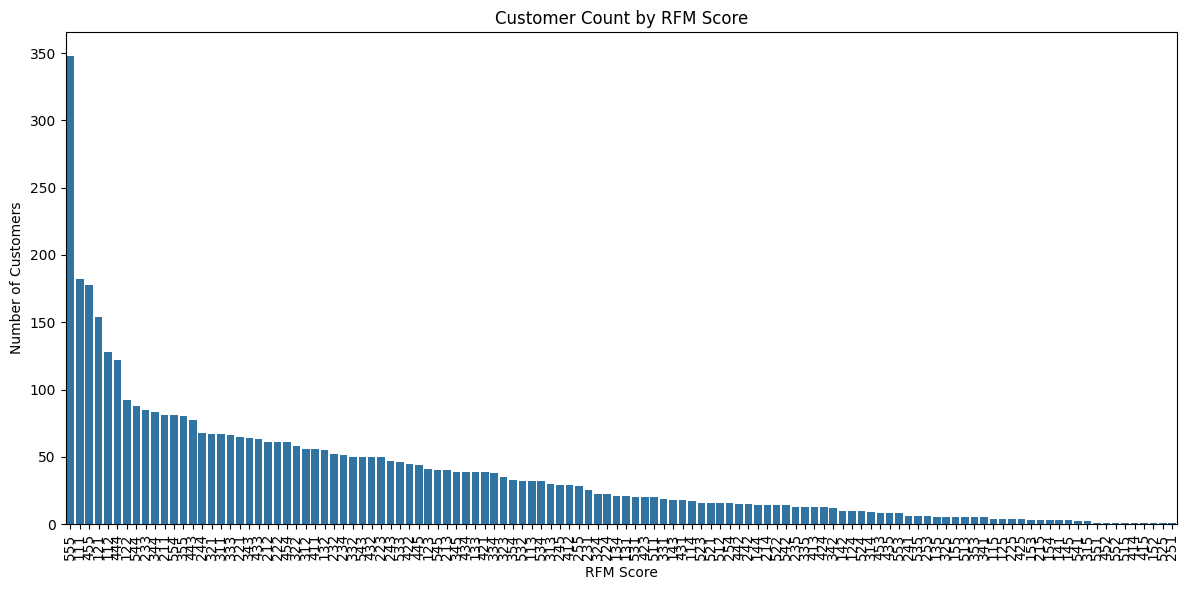

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart: count of customers per RFM score
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Customer Count by RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


### 📊 RFM Score Distribution

To visualize how customers are distributed across RFM profiles, I plotted a bar chart showing the count of customers for each composite `RFM_Score`.

### 🔍 Interpretation

- The distribution is **heavily skewed**: a few RFM scores dominate the customer base.
- The most common score appears in over **350 customers**, while most other scores have far fewer.
- This suggests that many customers share similar behavioral patterns — likely low recency, low frequency, and low monetary value.
- High-value scores like `555`, `554`, or `545` are much less frequent, indicating that **top-tier customers are rare**.

### 🧠 Implications

- Marketing efforts should focus on nurturing the small group of high-score customers.
- The large low-score segments may benefit from reactivation campaigns or targeted promotions.
- This distribution validates the need for segmentation — not all customers contribute equally to business value.

Next, I’ll visualize how **Recency and Frequency** interact with **Monetary** scores using a heatmap.


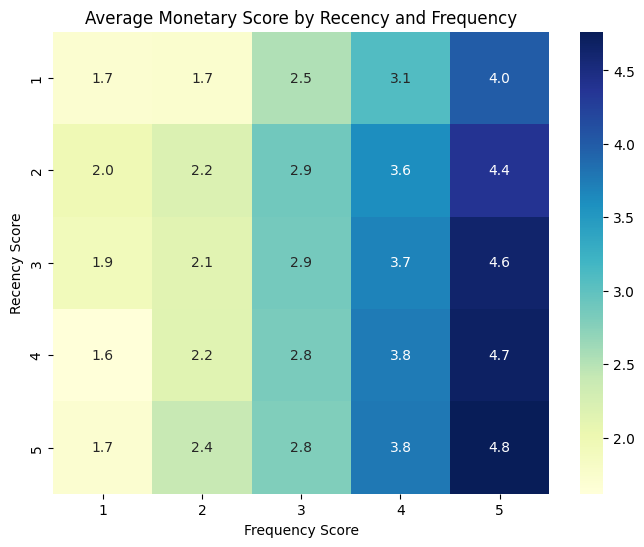

In [48]:
rfm_heatmap = rfm.groupby(['R_Score', 'F_Score'])['M_Score'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Monetary Score by Recency and Frequency')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()


### 🔥 Heatmap: Average Monetary Score by Recency and Frequency

To explore how customer behavior correlates with spending, I visualized the average **Monetary Score** across combinations of **Recency Score** and **Frequency Score**.

### 🔍 Interpretation
- **Trend**: As both **Recency** and **Frequency** scores increase, the **average Monetary Score** also increases.
- **High-value zone**: The bottom-right corner (R=5, F=5) shows the highest average monetary score (~4.8), indicating that recent and frequent buyers tend to spend the most.
- **Low-value zone**: The top-left corner (R=1, F=1) has the lowest monetary scores (~1.7), representing inactive and infrequent customers.

### 🧠 Implications

- Customers with high R and F scores are consistently high spenders — ideal targets for loyalty programs and premium offers.
- Customers with low R and F scores show low monetary value — candidates for reactivation or churn prevention strategies.
- This heatmap confirms that **recency and frequency are strong predictors of monetary value**, validating the RFM model's structure.


## 🧩 Step 5: Segmenting Customers by RFM Score

Using the composite `RFM_Score`, I assigned each customer to a behavioral segment:

| Segment          | Description                                 |
|------------------|---------------------------------------------|
| Champions        | Recent, frequent, and high-spending         |
| Loyal Customers  | Recent and frequent, moderate spend         |
| Frequent Buyers  | High frequency, moderate recency/spend      |
| Big Spenders     | High monetary value, less frequent          |
| At Risk          | Long ago, low frequency, low spend          |
| Lost             | No recent activity, minimal engagement      |
| Others           | Mixed behavior not fitting above categories |

This segmentation will guide targeted strategies like retention, upselling, or reactivation.


In [37]:
def segment_customer(rfm):
    score = rfm['RFM_Score']
    if score == '555':
        return 'Champions'
    elif score[0] == '5':
        return 'Loyal Customers'
    elif score[1] == '5':
        return 'Frequent Buyers'
    elif score[2] == '5':
        return 'Big Spenders'
    elif score[:2] == '11':
        return 'At Risk'
    elif score == '111':
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [38]:
rfm['Segment'].value_counts()

Segment
Others             2502
Loyal Customers     520
Frequent Buyers     429
At Risk             359
Champions           348
Big Spenders        181
Name: count, dtype: int64

### 📊 Visualization

C:\Users\haithem0\AppData\Local\Temp\ipykernel_12780\2670535734.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


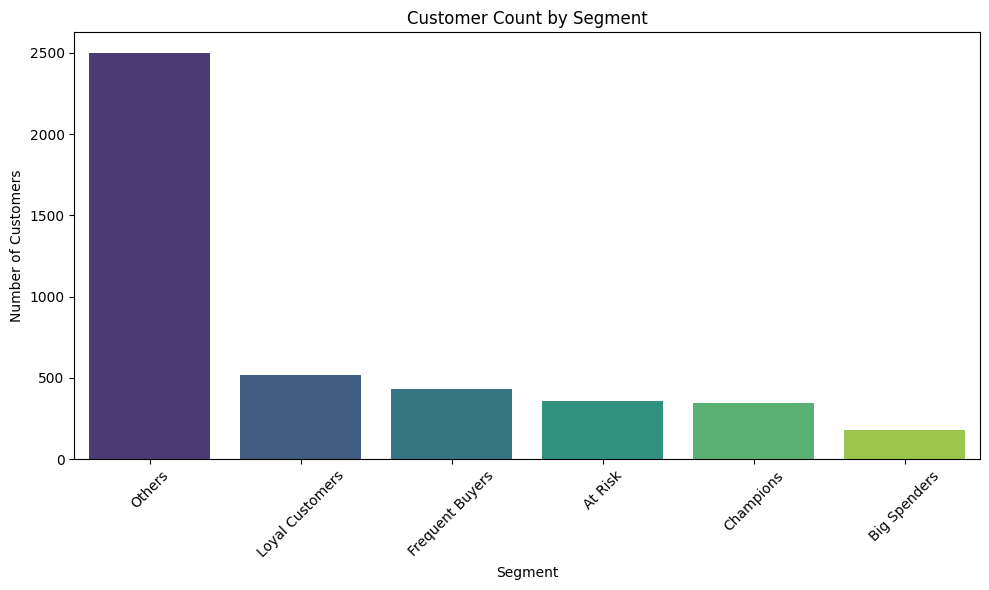

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of customers per segment
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


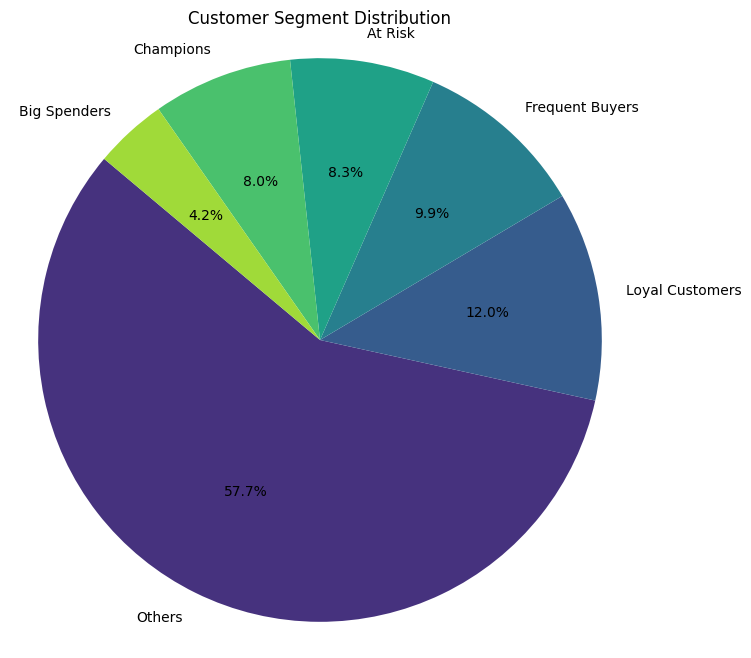

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Customer Segment Distribution')
plt.axis('equal')
plt.show()


### 📊 Segment Distribution Visualization

To understand how customers are distributed across behavioral segments, I plotted both a bar chart and a pie chart.

#### 🔍 Interpretation

- The **"Others"** segment dominates, indicating many customers don't fit neatly into high-value categories.
- **Champions**, **Loyal Customers**, and **Frequent Buyers** together form a valuable minority worth targeting for retention and upselling.
- **At Risk** and **Big Spenders** may need tailored strategies — either to re-engage or to maximize their spend.

These visualizations reinforce the importance of differentiated marketing and customer relationship strategies.


## 🧠 Step 6: Strategic Recommendations

Based on the RFM segmentation, I propose the following targeted strategies:

| Segment          | Recommended Action                                         |
|------------------|------------------------------------------------------------|
| Champions        | Reward loyalty with VIP perks and exclusive offers         |
| Loyal Customers  | Encourage referrals and offer bundled deals                |
| Frequent Buyers  | Upsell complementary products and offer volume discounts   |
| Big Spenders     | Provide premium services and personalized outreach         |
| At Risk          | Re-engage with time-sensitive promotions and reminders     |
| Others           | Monitor for behavioral changes or run broad campaigns      |

These strategies aim to maximize customer lifetime value and optimize marketing efforts.


### 📈 Business Implications
**Retention Focus:** Champions and Loyal Customers are high-value — retaining them is critical.

**Growth Opportunities:** Frequent Buyers and Big Spenders may respond well to personalized upselling.

**Risk Management:** At Risk customers need proactive engagement to prevent churn.

**Efficiency:** Avoid spending heavily on low-engagement segments unless behavior changes.